In [1]:
#
# Import Libraries
#

from dotmap import DotMap
import numpy as np
import os
import pandas as pd
import sys

#from sklearn.decomposition import FactorAnalysis
#from factor_analyzer import FactorAnalyzer

from mofapy2.run.entry_point import entry_point
import mofax as mfx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

from plotly import graph_objects as go
from plotly.subplots import make_subplots

utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\PESA_V2"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\PESA_V2"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm.tsv")

# Feature info
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "f2i.tsv")
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\PESA_V2\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\PESA_V2\myRData"


qualCols = ['Smoke_dummy', 'Caso/control']
quanCols = [
    'Plaque_thickness',
    'Calcium_Score',
    'Plaque_burden',
    'Total_Cholesterol',
    'HDL',
    'LDL',
    'Ox-LDL',
    'Lipoprotein a',
    'CRP',
    'Framingham 10y',
    'Framingham 30y',
    'deqage',
    'Systolic Blood Pressure',
    'Diastolic Blood Pressure'
]

In [3]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col='Seqn')

In [4]:
# Intersect q-omics and m-omics

seqn = np.intersect1d(
    xq.index,
    xm.index
)

xqi = xq.loc[seqn].copy()
xmi = xm.loc[seqn].copy()
mdatai = mdata.loc[seqn]

In [5]:
#
# Run MOFA
#

# Create data matrix object (without separating by groups)

data_mat = [
    [
    xqi.to_numpy(),
    ],
    [
    xmi.to_numpy(),
    ]
]

ent = entry_point()
ent.set_data_options(scale_groups=False, scale_views=False, center_groups=False)

ent.set_data_matrix(
    data_mat, 
    views_names=['q', 'm'], 
    features_names=[xqi.columns, xmi.columns],
    samples_names=[[str(i) for i in seqn]],
    likelihoods=['gaussian', 'gaussian']
)

ent.set_model_options(
    factors = 25, 
    spikeslab_weights = True, 
    spikeslab_factors=False,
    ard_weights = True,
    ard_factors=True
)

ent.set_train_options(
    convergence_mode = "slow", 
    iter=10000,
    dropR2 = 0.015, 
    gpu_mode = False, 
    seed = 1,
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='q' group='group0' with N=428 samples and D=249 features...
Successfully loaded view='m' group='group0' with N=428 samples and D=2062 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination pri

In [6]:
ent.build()

ent.run()

# Save the output
ent.save(outfile=r'./modelpy.hdf5')



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -15616391.46 

Iteration 1: time=1.26, ELBO=-1399410.15, deltaELBO=14216981.310 (91.03883791%), Factors=24
Iteration 2: time=1.12, ELBO=-1279903.66, deltaELBO=119506.494 (0.76526318%), Factors=23
Iteration 3: time=1.19, ELBO=-1242818.23, deltaELBO=37085.429 (0.23747758%), Factors=22
Iteration 4: time=1.01, ELBO=-1227330.11, deltaELBO=15488.117 (0.09917859%), Factors=21
Iteration 5: time=1.15, ELBO=-1218784.61, deltaELBO=8545.498 (0.05472134%), Factors=20
Iteration 6: time=0.97, ELBO=-1211667.45, deltaELBO=7117.169 (0.04557499%), Factors=19
Iteration 7: time=0.89, ELBO=-1211319.00, deltaELBO=348.448 (0.00223130%), Factors=18
Iteration 8: time=0.84, ELBO=-1211674.51, deltaELBO=-355.516 (0.00227656%), Factors=17
Warning, lower bound is decreasing...
Iteration 9: time=0.84, ELBO=-1211690.39, deltaELBO=-15.878 (0.00010168%), Factors=16
Warning, lower 

In [6]:
m = mfx.mofa_model('modelpy.hdf5')

In [7]:
print(f"""\
Observations: {m.shape[0]}
Features: {m.shape[1]}
Groups of observations: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Observations: 428
Features: 2311
Groups of observations: group0
Views: q, m



In [8]:
# Get weights from the model

wq = m.get_weights(df=True).loc[xqi.columns]
wm = m.get_weights(df=True).loc[xmi.columns]

In [9]:
# Variance explained by factors

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')
explVar

View,m,q
Factor,,
Factor1,4.763432,0.216921
Factor10,1.869685,0.556192
Factor2,2.634387,2.317918
Factor3,4.134855,0.138260
Factor4,2.614422,1.205558
Factor5,3.511027,0.173895
Factor6,3.144255,0.443380
Factor7,3.172930,0.097649
Factor8,2.638039,0.301929


In [10]:
import plotly.express as px
palette = px.colors.qualitative.Plotly

Global Analysis of MOFA

In [11]:
# Variance explained by factors
import re

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')

explVar = explVar.loc[[
    f'Factor{j}'
    for j in 
    np.sort([int(re.search('([0-9]+)', i).groups()[0]) for i in explVar.index])
]]

explVar

View,m,q
Factor,,
Factor1,4.763432,0.216921
Factor2,2.634387,2.317918
Factor3,4.134855,0.138260
Factor4,2.614422,1.205558
Factor5,3.511027,0.173895
Factor6,3.144255,0.443380
Factor7,3.172930,0.097649
Factor8,2.638039,0.301929
Factor9,2.476919,0.105784


In [12]:
#
# Correlation Analysis between Projections and metadata
#

import statsmodels.api as sm
from statsmodels.formula.api import ols


pv = {}
model = {}

for n, nfactor in enumerate(m.get_factors().T):

    pv[n] = {}
    model[n] = {}

    for mdatacol in quanCols:

        # model[n][mdatacol] = sm.OLS(
        #     mdatai[mdatacol],
        #     sm.add_constant(nfactor)
        # ).fit()
        model[n][mdatacol] = sm.OLS(
            nfactor,
            sm.add_constant(mdatai[mdatacol])
        ).fit()

        pv[n][mdatacol] = model[n][mdatacol].pvalues[-1]
    
    for mdatacol in qualCols:
        model[n][mdatacol] = ols(
            'y ~ C(x)', 
            pd.DataFrame({
                'y': nfactor,
                'x': mdatai.loc[:, mdatacol]
            })
        ).fit()

        pv[n][mdatacol] = sm.stats.anova_lm(model[n][mdatacol])['PR(>F)']['C(x)']

pv = pd.DataFrame(pv)
pv.columns = explVar.index
pd.concat([
    explVar.T.round(3),
    pv
])

from statsmodels.stats.multitest import multipletests

pvfdr = pv.copy()
for i in pv.columns:
    pvfdr[i] = multipletests(pvfdr[i], method='fdr_bh')[1]

pd.concat([
    explVar.T,#.round(3),
    pvfdr
])#.round(4)

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
m,4.763432,2.634387e+00,4.134855,2.614422e+00,3.511027,3.144255e+00,3.172930,2.638039,2.476919,1.869685
q,0.216921,2.317918e+00,0.138260,1.205558e+00,0.173895,4.433801e-01,0.097649,0.301929,0.105784,0.556192
Plaque_thickness,0.761138,7.715759e-05,0.519367,4.872856e-01,0.926919,2.052861e-04,0.752873,0.019739,0.113726,0.504858
Calcium_Score,0.383849,5.086636e-02,0.519367,2.650596e-01,0.976560,4.469015e-02,0.737490,0.134639,0.113726,0.436377
Plaque_burden,0.725758,8.276780e-03,0.782055,2.650596e-01,0.797074,1.110238e-03,0.696239,0.030947,0.281285,0.436377
Total_Cholesterol,0.225749,5.045087e-04,0.000015,3.611291e-02,0.014445,5.170120e-01,0.796126,0.128611,0.000581,0.396552
HDL,0.225749,4.079636e-08,0.395492,1.250377e-17,0.006925,5.666665e-01,0.696239,0.895107,0.287752,0.436377
LDL,0.383849,5.635344e-01,0.000651,4.640282e-01,0.553152,8.782002e-01,0.796126,0.063395,0.000891,0.396552
Ox-LDL,0.559459,2.636158e-03,0.271376,2.650596e-01,0.357122,4.114851e-01,0.796126,0.499531,0.755698,0.436377
Lipoprotein a,0.840103,4.712365e-01,0.782055,2.838676e-01,0.119936,6.690478e-01,0.796126,0.772271,0.943285,0.627964


In [13]:
coefs = pd.DataFrame({i: {j: model[i][j].params[1] for j in model[i]} for i in model})#, columns=explVar.index)
coefs.columns = explVar.index
coefs

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
Plaque_thickness,-0.006033,0.028720,-0.009949,-0.005536,-0.003883,-0.026329,0.004348,-0.016172,0.016221,0.005421
Calcium_Score,0.000792,0.000578,-0.000381,-0.000400,-0.000012,-0.000612,0.000209,-0.000401,0.000658,-0.000319
Plaque_burden,0.000412,0.001000,-0.000185,-0.000526,-0.000438,-0.001233,0.000384,-0.000780,0.000648,0.000337
Total_Cholesterol,-0.008660,0.007498,-0.016838,0.005140,-0.009138,-0.001819,0.000920,0.003070,-0.009383,0.003224
HDL,-0.025739,-0.038772,-0.013955,0.058165,-0.033831,0.004778,0.006458,0.000699,-0.011455,0.006794
LDL,-0.006183,0.001476,-0.015290,0.002074,-0.004510,-0.000339,0.000586,0.004357,-0.010021,0.002998
Ox-LDL,0.006727,0.011320,-0.009427,-0.005027,-0.008682,-0.004092,0.001344,0.002652,-0.002376,0.003386
Lipoprotein a,0.000875,-0.001438,0.000812,0.002279,-0.005647,0.000905,-0.000462,0.000480,0.000444,-0.000932
CRP,0.705869,1.176688,0.851347,-1.460274,0.214262,-0.856485,-0.229894,-0.180833,-0.437090,-0.416579
Framingham 10y,0.250722,9.684724,-4.627752,-5.855113,0.704303,-6.793455,-2.545805,-1.547819,-0.538591,-0.244260


Factor Analysis

In [18]:
top = 20
col = 'Factor6'

fig = make_subplots(rows=1, cols=2, subplot_titles=[f'q | {round(explVar.loc[col]["q"],4)}%', f'm | {round(explVar.loc[col]["m"],4)}%'])
fig.add_trace(go.Scatter(
    y=np.arange(wq.shape[0])/wq.shape[0],
    x=sorted(wq[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wq.shape[0]-2*top)*[palette[0]] + top*['black'],
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=np.arange(wm.shape[0])/wm.shape[0],
    x=sorted(wm[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wm.shape[0]-2*top)*[palette[1]] + top*['black'],
    showlegend=False
), row=1, col=2)

fig.update_xaxes(range=(-1,1), title='Weight')
fig.show()

w_all = {}
for df, omic, xi in [(wq, 'q', xqi), (wm, 'm', xmi)]:
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Negative', 'Positive'], horizontal_spacing=0.15)

    tmp = df.sort_values(col, ascending=False)[col]
    w_all[omic] = tmp
    topup = tmp[:top]
    topdo = tmp[-top:]

    fig.add_trace(go.Bar(
        y=topup.index[::-1],
        x=topup.values[::-1],
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        y=topdo.index,
        x=topdo.values,
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=1)
    fig.update_xaxes(range=(-1,1), title='Weight')
    fig.update_layout(height=400+15*top, title=omic)
    #fig.show()

    #sns.clustermap(xi.loc[:, topup.index.tolist()+topdo.index.tolist()].T, cmap='vlag', figsize=(12,6), center=0, vmin=-3, vmax=3)

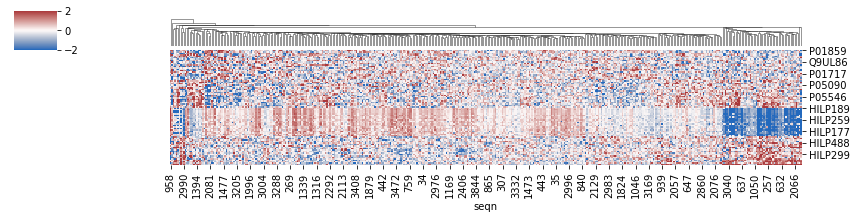

In [19]:
# HEATMAP

#prots = ['P27169','P80108','P02647','P02652']
nqup=20
nqdo=20
nmup=20
nmdo=20

tmp = xqi.loc[
    :,
    #table.index
    w_all['q'][:nqup].index.tolist()+w_all['q'][-nqdo:].index.tolist()
    #['P00738', 'P05546']
    #['B9A064','P0CG05', 'P01859', 'S6BAR0', 'S6BGF5', 'P01857', 'P01605']
    #['P05546', 'P04114']
    ].join(
    xmi.loc[
        :, 
        w_all['m'][:nmup].index.tolist()+w_all['m'][-nmdo:].index.tolist()
        #['HILP688', 'HILP675']
        # ['HILP795', 'HILP771', 'HILP793', 'HILP840', 'HILP838',
        #'HILP779', 'HILP688', 'HILP675']
        # 'HILP688', 'HILP675', 'HILP779']
        ]
    ).T

hmap = sns.clustermap(
    tmp,
    cmap='vlag', figsize=(12,3), center=0, row_cluster=False, col_cluster=True, vmin=-2, vmax=2)

In [33]:
# Export table with factors

q2i.set_index('fid').join(wq, how='inner').to_csv('Tables/qFactors.tsv', sep='\t')
m2i.set_index('fid').join(wm, how='inner').to_csv('Tables/mFactors.tsv', sep='\t')

In [23]:
wm.Factor2.to_numpy()[wm.Factor2.to_numpy().argsort()[-10:]]
wm.Factor2.to_numpy()[(-wm.Factor2.to_numpy()).argsort()[-10:]]

np.concatenate(
[wm.Factor2.to_numpy().argsort()[-10:],
(-wm.Factor2.to_numpy()).argsort()[-10:]]
)

array([1340,   60,  504, 1444, 1216,  727, 1373,  742, 1245, 1362, 1367,
       1431, 1433,  789, 1387,  785, 1369, 1365,  759, 1389], dtype=int64)

In [24]:
m2i

,fid,Name,Apex m/z,RT [min],Platform,Mode,TP_ID,Peptide,Halogenated,Plant,NaturalProduct,MDM,Drug,Food,TP_Adduct,TP_Class_argmax,TPMetrics,MODE
0,C18N1,A0641,132.029840,0.400000,C18N,NEG,deoxy-(lysino)-fructose // Aspartate | Iminodi...,|,|,|,| NP,|,| Drug,|,M-H | M-H,|,0.0 | 0.0,NaN
1,C18N2,A0646,135.029670,0.404000,C18N,NEG,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,NaN
2,C18N3,A0648,649.120410,0.407000,C18N,NEG,{[bis(dihydroxyphenyl)-hydroxy-oxo-dioxatricyc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M+Na-2H,NaN,8.776906255397188,NaN
3,C18N4,A0656,212.001980,0.411000,C18N,NEG,Indoxyl sulfate | Carmustine,|,| x,|,|,|,| Drug,| Food,M-H | M-H,|,0.0 | 0.0,NaN
4,C18N5,A0658,215.066800,0.412000,C18N,NEG,Hydroxyalanylclavam | Thiodianiline,|,|,|,|,|,|,|,M-H | M-H,|,0.0 | 0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,HILP2039,AH_2655,932.144473,3.693681,HILIC,NaN,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,POS
6063,HILP2040,AH_2656,947.658866,2.283257,HILIC,NaN,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,POS
6064,HILP2041,AH_2657,956.316894,4.040705,HILIC,NaN,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,POS
6065,HILP2042,AH_2658,958.313924,4.043271,HILIC,NaN,Pentaglutamyl folate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M+H,NaN,0.0,POS


In [149]:

m2i.set_index('fid').loc[wm.index[np.abs(wm.Factor2.to_numpy()).argsort()[:20]], ['TP_ID']]

m2i.set_index('fid').join(
    wm.iloc[
        np.concatenate([
            wm.Factor2.to_numpy().argsort()[-15:],
            (-wm.Factor2.to_numpy()).argsort()[-15:]
        ])][['Factor2']],
    how='inner'
    ).loc[:, :].sort_values('Factor2', ascending=False).to_excel('Tables/Summary/m_factor2.xlsx')

In [211]:
table = q2i.set_index('fid').join(
    wq.iloc[np.abs(wq.Factor2.to_numpy()).argsort()[-60:]][['Factor2']],
    how='inner'
).sort_values('Factor2', ascending=False)

In [212]:
table

,qdesc,Np,Factor2
E9KL26,>tr|E9KL26|E9KL26_HUMAN Epididymis tissue prot...,31,0.697156
P05546,>sp|P05546|HEP2_HUMAN Heparin cofactor 2 OS=Ho...,29,0.661651
P01008,>sp|P01008|ANT3_HUMAN Antithrombin-III OS=Homo...,55,0.651082
P29622,>sp|P29622|KAIN_HUMAN Kallistatin OS=Homo sapi...,21,0.624876
P01031,>sp|P01031|CO5_HUMAN Complement C5 OS=Homo sap...,88,0.620801
P08185,>sp|P08185|CBG_HUMAN Corticosteroid-binding gl...,12,0.584812
P04114,>sp|P04114|APOB_HUMAN Apolipoprotein B-100 OS=...,328,0.581594
P35858,>sp|P35858|ALS_HUMAN Insulin-like growth facto...,19,0.578883
P06681,>sp|P06681|CO2_HUMAN Complement C2 OS=Homo sap...,32,0.576341
Q8TAQ9,>sp|Q8TAQ9|SUN3_HUMAN SUN domain-containing pr...,1,0.564114


In [225]:
table.to_excel('Tables/Summary/q_factor2.xlsx')

In [38]:
xq[['Q13790','P04114']].corr(method='pearson')
#np.corrcoef(xq.P05090, xq.P02649)

,Q13790,P04114
Q13790,1.000000,0.124677
P04114,0.124677,1.000000


In [85]:

zz1 = m2i.set_index('fid').loc[w_all['m'][-nmdo:].index]#[['ID', 'Abbrev', 'TP_ID']]
zz1.to_csv(f'Tables/{col}_m_down.tsv', sep='\t')

zz2 = m2i.set_index('fid').loc[w_all['m'][:nmup].index]#[['ID', 'Abbrev', 'TP_ID']]
zz2.to_csv(f'Tables/{col}_m_up.tsv', sep='\t')

zz3 = q2i.set_index('fid').loc[w_all['q'][-nqdo:].index]
zz3.to_csv(f'Tables/{col}_q_down.tsv', sep='\t')

zz4 = q2i.set_index('fid').loc[w_all['q'][:nqup].index]
zz4.to_csv(f'Tables/{col}_q_up.tsv', sep='\t')

In [360]:
tmp = mdatai.loc[mdatai.index[hmap.dendrogram_col.reordered_ind], 'Plaque_thickness']
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[str(i) for i in tmp.index],
    y=tmp, mode='markers'
))

In [709]:
mdatacol = qualCols[1]

# fig = go.Figure()

# fig.add_trace(go.Violin(
#     x=(mdatai[mdatacol]==0).sum()*['Control'],
#     y=m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
#     box_visible=True, points="all", showlegend=False
# ))

# fig.add_trace(go.Violin(
#     x=(mdatai[mdatacol]==1).sum()*['Disease'],
#     y=m.get_factors()[mdatai[mdatacol]==1,nfactor-1],
#     box_visible=True, points="all", showlegend=False
# ))

import plotly.figure_factory as ff

hist_data = [
    m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
    m.get_factors()[mdatai[mdatacol]==1,nfactor-1]
]

group_labels = ['Control', 'Disease']
colors = [palette[0], palette[1]]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors, curve_type='kde')

# Add title
fig.update_xaxes(range=(-2.5,2.5))
fig.update_layout(title_text=f'{col} distribution per {mdatacol}')
fig.show()

#
# Violin Plot
#

# fig = go.Figure()
# data = [
#     m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
#     m.get_factors()[mdatai[mdatacol]==1,nfactor-1]
# ]
# # for data_line, color in zip(data, palette[:2]):

# fig.add_trace(go.Violin(x=data[0], line_color=palette[0], opacity=0.5, name='Control'))
# fig.add_trace(go.Violin(x=data[1], line_color=palette[1], opacity=1, name='Disease'))

# fig.update_traces(orientation='h', side='positive', width=100, points=False)
# fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False, title=f'{col} distribution per {mdatacol}')
#fig.update_xaxes(range=(-2.2,2.2))
# fig.show()
# # m.get_factors()[mdatai['Caso/control']==0,nfactor-1]


In [711]:
nfactor = 6

fig = go.Figure()

for mdatacol in quanCols:

    fig.add_trace(go.Scatter(
        x=m.get_factors()[:,nfactor-1],
        y=mdatai[mdatacol],
        name=mdatacol, mode='markers', marker_size=2.5
    ))

fig.show()

mdatacol = 'LDL'
fig = px.scatter(
    pd.DataFrame({mdatacol: mdatai[mdatacol], f'Factor {nfactor}': m.get_factors()[:,nfactor-1]}),
    x=f'Factor {nfactor}', y=mdatacol, trendline='ols'
    )

fig.show()

STRING FUNCTIONS

In [133]:
from STRING import Uniprot2String, FunctionalEnrichment

In [152]:
xq.columns

Index(['P04114', 'V9HWA9', 'P02768', 'P0C0L4', 'P01023', 'P02751', 'P02787',
       'P08603', 'P01031', 'P02671',
       ...
       'Q8IZD7', 'Q8N355', 'Q9UL77', 'P01602', 'P01743', 'P01764', 'H0Y509',
       'Q1KLZ0', 'Q6PIQ7', 'S4R460'],
      dtype='object', length=470)

In [220]:
background = Uniprot2String(
    q2i['fid'].tolist()
    #xq.columns.tolist()
)

background = [i[1] for i in background]

In [221]:
my_genes = Uniprot2String(
    table.index
    #w_all['q'].index.tolist()[:20]+w_all['q'].index.tolist()[-20:]
)
my_genes = [i[1] for i in my_genes]

In [222]:
data = FunctionalEnrichment(my_genes, background, species=9606)

from io import StringIO

data = pd.read_csv(
    StringIO(data),
    sep='\t'
)

In [223]:
col = ['category', 'number_of_genes', 'number_of_genes_in_background', 'fdr', 'description']
categories = ['Process', 'KEGG', 'Component']
data[np.isin(data['category'], categories)].sort_values('fdr').loc[:, col].head(15)

,category,number_of_genes,number_of_genes_in_background,fdr,description
67,Component,31,1021,3.140000e-13,Extracellular space
68,Component,28,759,7.050000e-13,Extracellular exosome
117,KEGG,13,63,1.910000e-12,Complement and coagulation cascades
69,Component,14,93,6.800000e-12,Blood microparticle
23,Process,13,115,3.930000e-08,Negative regulation of proteolysis
24,Process,13,134,1.190000e-07,Negative regulation of hydrolase activity
25,Process,9,43,3.820000e-07,Regulation of humoral immune response
26,Process,8,40,3.970000e-06,Regulation of complement activation
27,Process,11,125,6.410000e-06,Regulation of immune effector process
70,Component,10,129,1.740000e-05,Endoplasmic reticulum lumen


In [224]:
import requests

res = requests.get(
    f'https://string-db.org/api/tsv/get_link?identifiers={"%0d".join(my_genes)}&species=9606'
    )

print(res.content.decode('ascii'))

url
https://string-db.org/cgi/link?to=132098F280F27327

